<a href="https://colab.research.google.com/github/zq0315/blog/blob/master/nadaraya_watson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

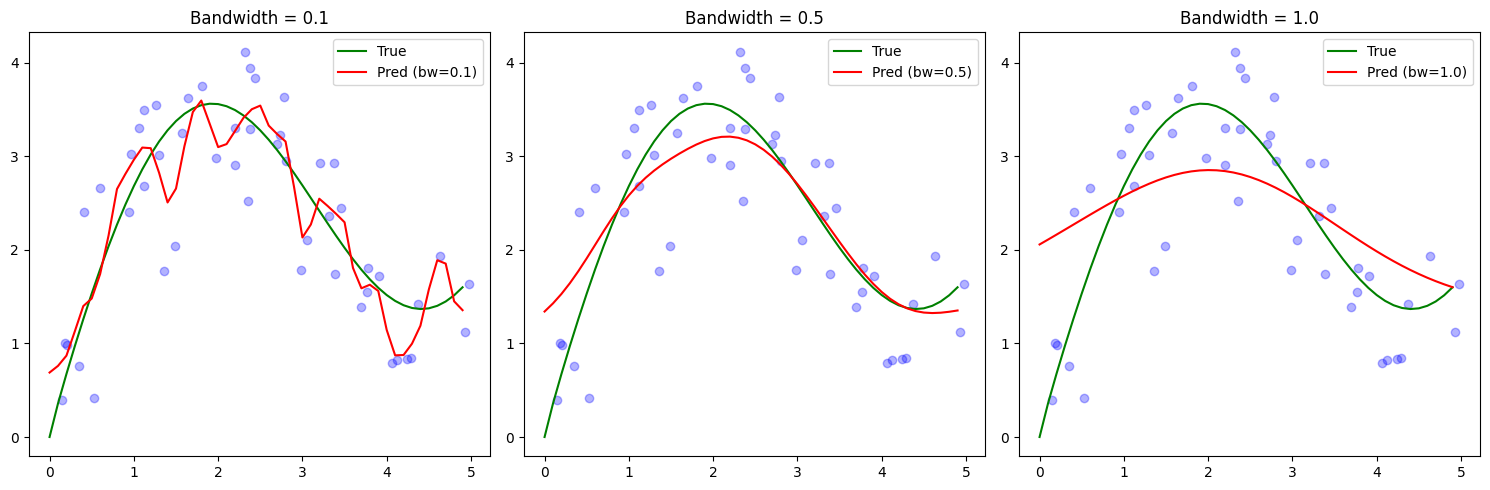

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成训练数据
n_train = 50
x_train = np.sort(np.random.rand(n_train) * 5)
def f(x):
    return 2 * np.sin(x) + x**0.8

y_train = f(x_train) + np.random.normal(0.0, 0.5, n_train)  # 添加噪声

# 生成测试数据
x_test = np.arange(0, 5, 0.1)
y_true = f(x_test)  # 真实函数值


def nadaraya_watson(x_query, x_keys, y_values, bandwidth=1.0):
    """
    非参数Nadaraya-Watson核回归
    :param x_query: 查询点
    :param x_keys: 训练数据键
    :param y_values: 训练数据值
    :param bandwidth: 核带宽
    :return: 预测值
    """
    predictions = []
    for x in x_query:
        # 计算高斯核权重
        weights = np.exp(-0.5 * ((x - x_keys) / bandwidth)**2)
        # 归一化权重
        weights /= np.sum(weights)
        # 加权平均
        prediction = np.sum(weights * y_values)
        predictions.append(prediction)
    return np.array(predictions)

# 使用不同带宽进行预测
bandwidths = [0.1, 0.5, 1.0]
plt.figure(figsize=(15, 5))

for i, bw in enumerate(bandwidths, 1):
    y_pred = nadaraya_watson(x_test, x_train, y_train, bandwidth=bw)

    plt.subplot(1, 3, i)
    plt.scatter(x_train, y_train, color='blue', alpha=0.3)
    plt.plot(x_test, y_true, label='True', color='green')
    plt.plot(x_test, y_pred, label=f'Pred (bw={bw})', color='red')
    plt.legend()
    plt.title(f'Bandwidth = {bw}')

plt.tight_layout()
plt.show()
